In [2]:
import os
os.chdir(r'D:\ML\minor project')
print("Current working directory:", os.getcwd())

Current working directory: D:\ML\minor project


In [3]:
import pandas as pd

df = pd.read_csv("Audio data original.csv")

df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


In [4]:
print(df.columns)

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'LABEL'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

Missing values:
 chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
LABEL                 0
dtype: int64


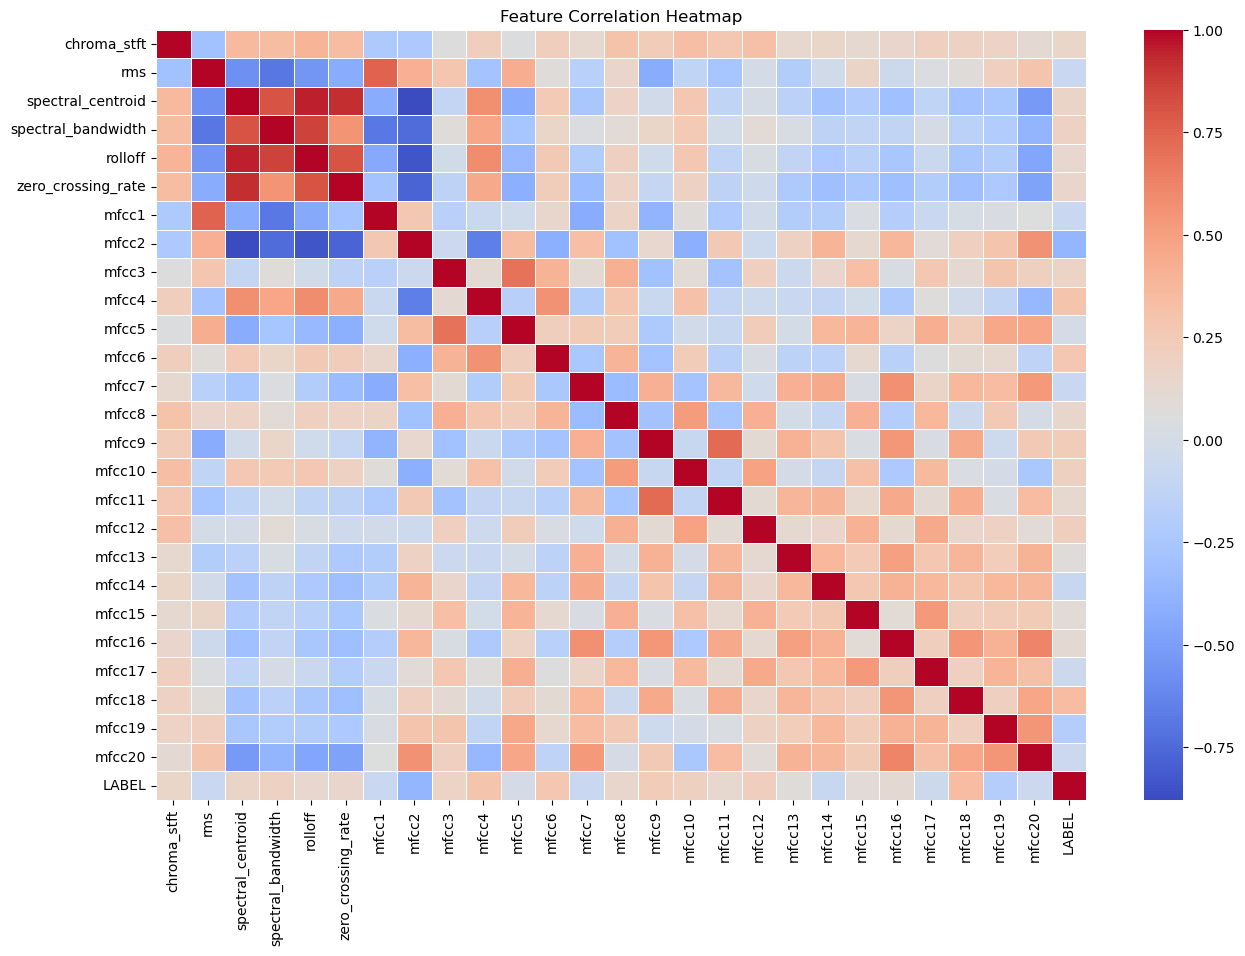

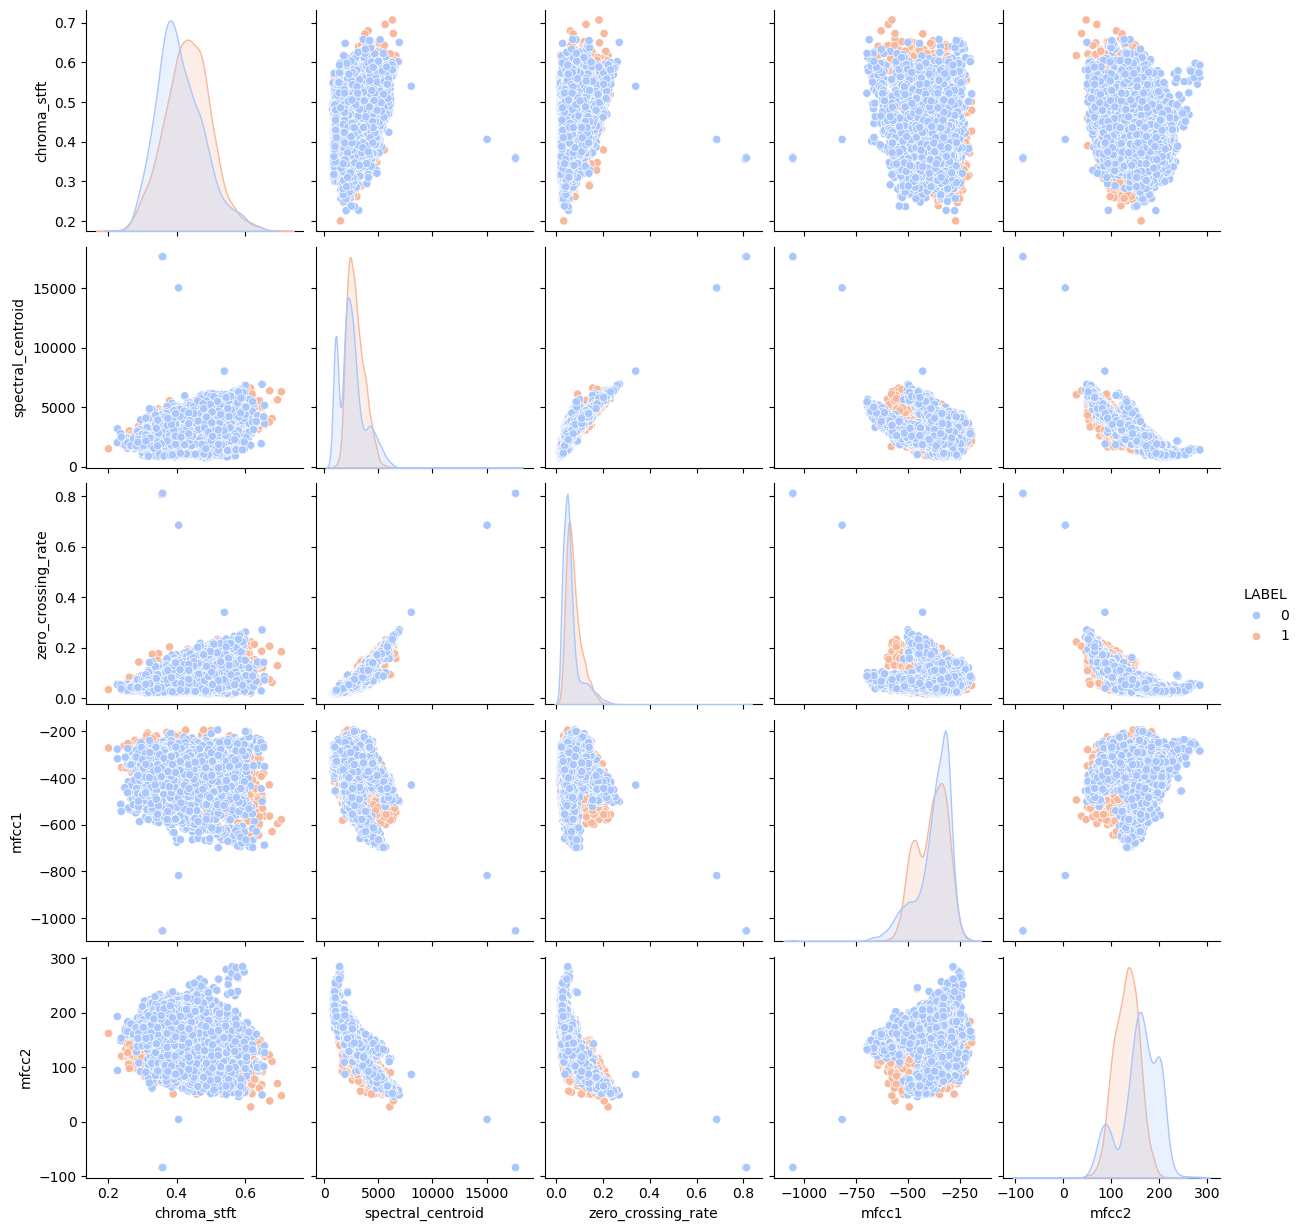

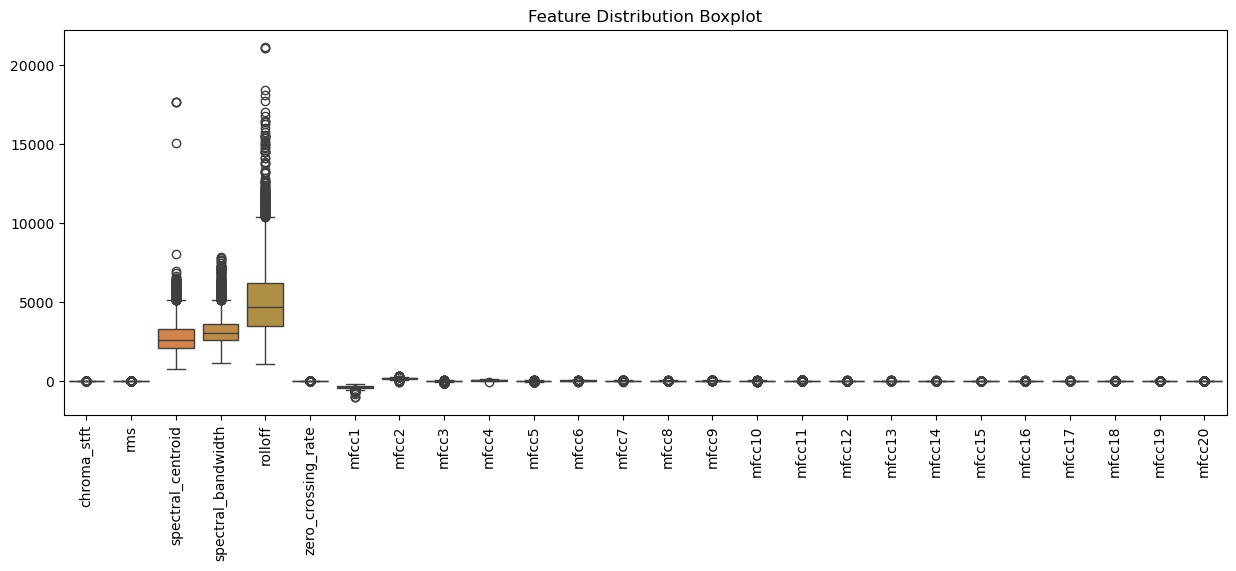

C:\Users\HP\AppData\Local\Temp\ipykernel_34060\2879316308.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["LABEL"], palette="coolwarm")


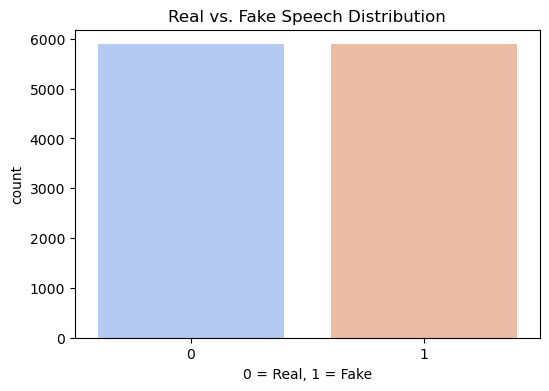

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df["LABEL"] = df["LABEL"].map({"REAL": 0, "FAKE": 1})

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

selected_features = ['chroma_stft', 'spectral_centroid', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'LABEL']
sns.pairplot(df[selected_features], hue="LABEL", diag_kind="kde", palette="coolwarm")
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df.drop(columns=['LABEL']))
plt.xticks(rotation=90)
plt.title("Feature Distribution Boxplot")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df["LABEL"], palette="coolwarm")
plt.title("Real vs. Fake Speech Distribution")
plt.xlabel("0 = Real, 1 = Fake")
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['LABEL'])
y = df['LABEL']

def remove_outliers_zscore(data, threshold=2.7):
    """Removes outliers beyond the given Z-score threshold."""
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores < threshold).all(axis=1)]

X_cleaned = remove_outliers_zscore(X)

y_cleaned = y.loc[X_cleaned.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(f"Original shape: {X.shape}, After outlier removal: {X_cleaned.shape}")


Original shape: (11778, 26), After outlier removal: (9970, 26)


C:\Users\HP\AppData\Local\Temp\ipykernel_34060\3003298049.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(X_cleaned.columns, rotation=90)
C:\Users\HP\AppData\Local\Temp\ipykernel_34060\3003298049.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(X_scaled_df.columns, rotation=90)


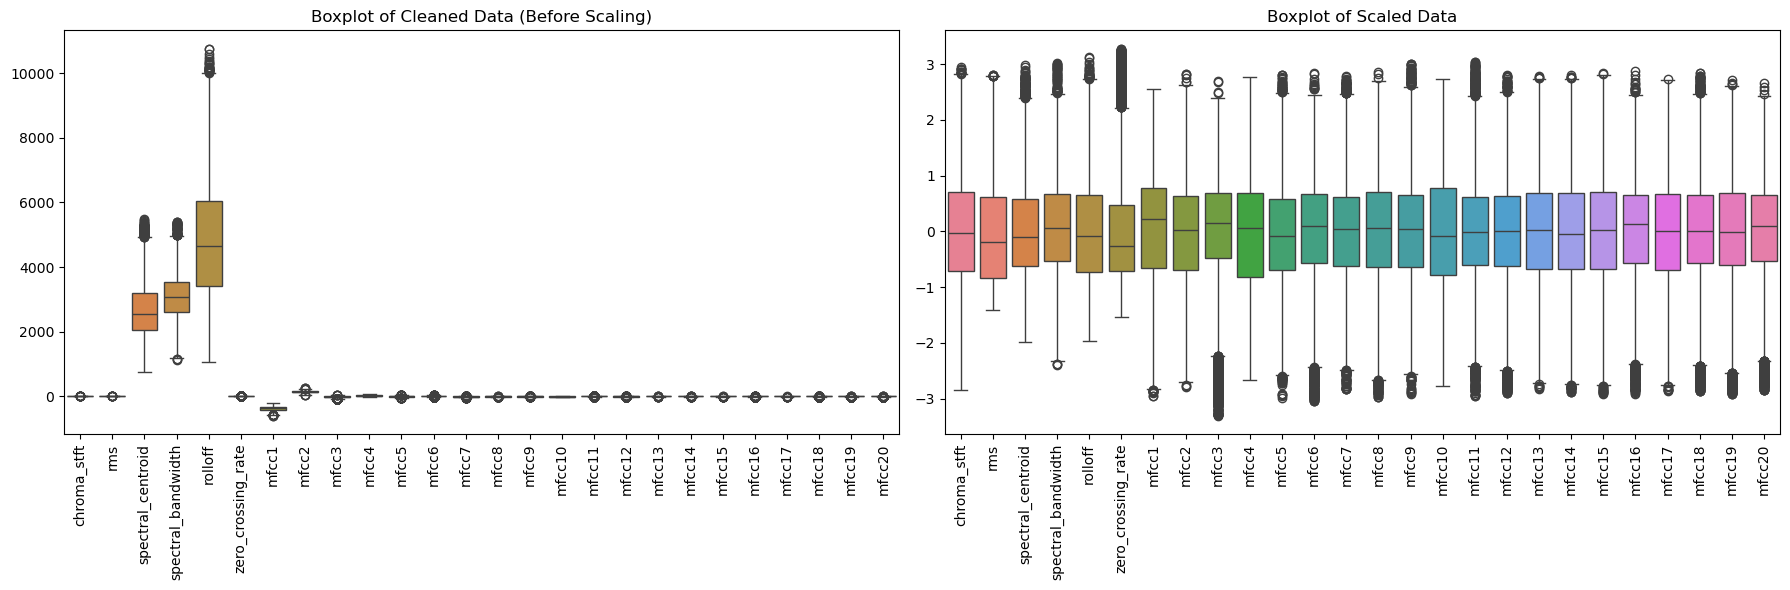

In [13]:

X_scaled_df = pd.DataFrame(X_scaled, columns=X_cleaned.columns)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=X_cleaned, ax=axes[0])
axes[0].set_xticklabels(X_cleaned.columns, rotation=90)
axes[0].set_title("Boxplot of Cleaned Data (Before Scaling)")

sns.boxplot(data=X_scaled_df, ax=axes[1])
axes[1].set_xticklabels(X_scaled_df.columns, rotation=90)
axes[1].set_title("Boxplot of Scaled Data")

plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


print("\nClassification Report:\n", classification_report(y_test, y_pred))




Model Accuracy: 0.9885

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       939
           1       0.99      0.99      0.99      1055

    accuracy                           0.99      1994
   macro avg       0.99      0.99      0.99      1994
weighted avg       0.99      0.99      0.99      1994



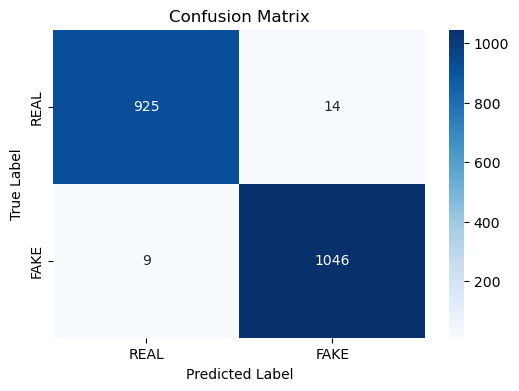

In [16]:

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


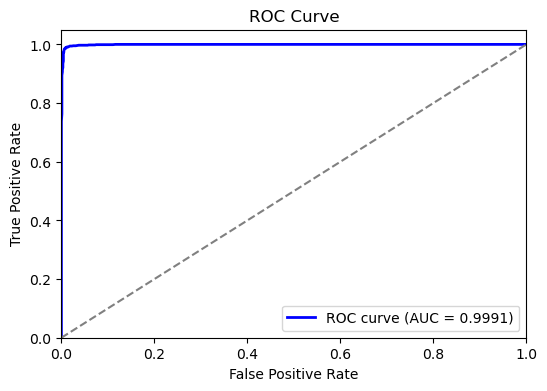

In [17]:

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [18]:
import pickle

with open("deepfake_voice_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully as 'deepfake_voice_model.pkl'")


Model saved successfully as 'deepfake_voice_model.pkl'


In [19]:

with open("deepfake_voice_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully!")

sample_input = X_test[0].reshape(1, -1)
predicted_label = loaded_model.predict(sample_input)
predicted_prob = loaded_model.predict_proba(sample_input)[:, 1]

print(f"Predicted Label: {'FAKE' if predicted_label[0] == 1 else 'REAL'}")
print(f"Prediction Confidence: {predicted_prob[0]:.4f}")


Model loaded successfully!
Predicted Label: FAKE
Prediction Confidence: 0.9400


Training Random Forest...
Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.9924
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      1178
        REAL       0.99      0.99      0.99      1178

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



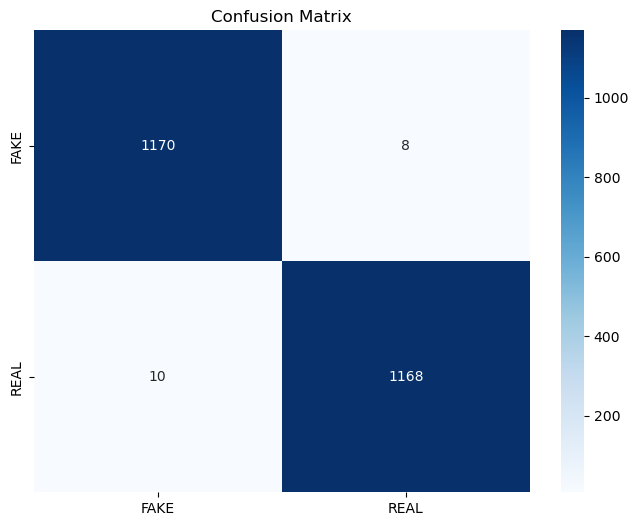

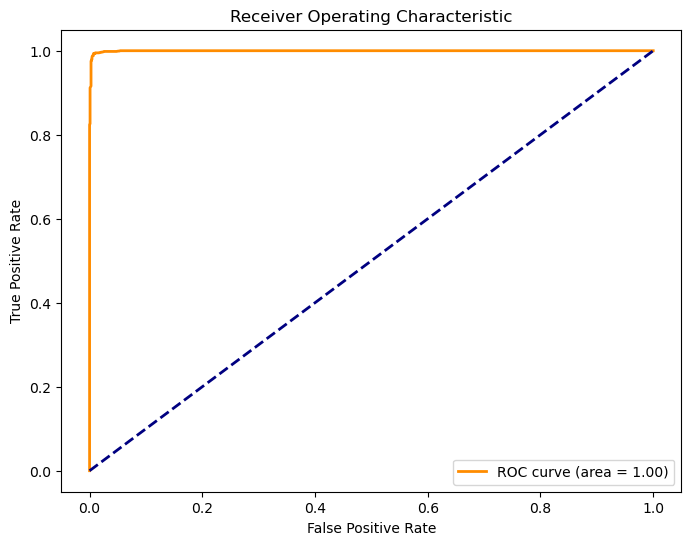

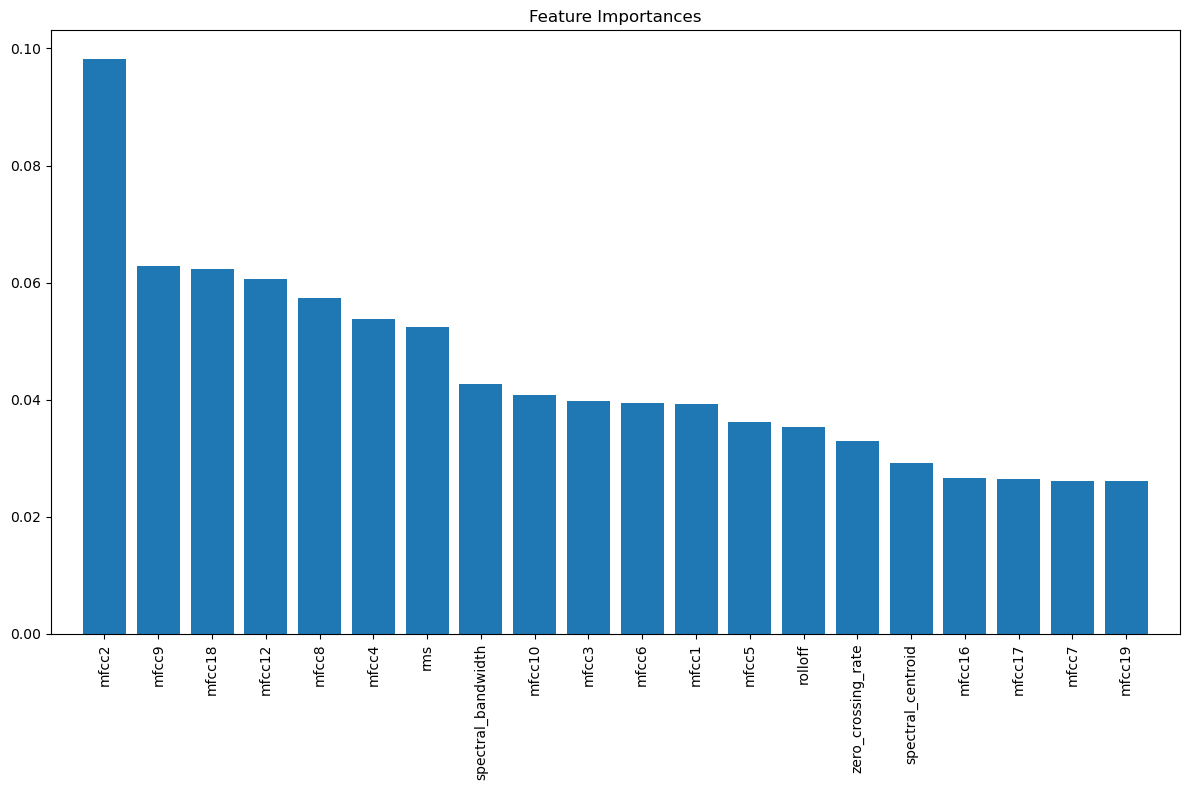

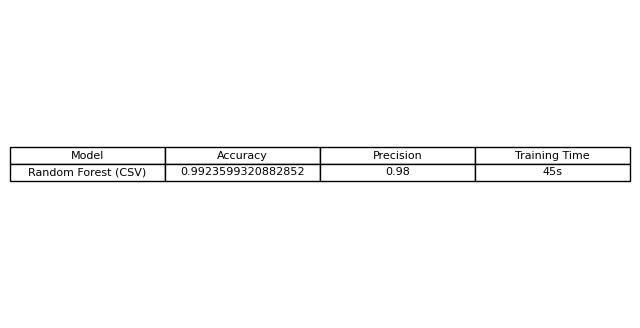

In [21]:
"""
Audio Deepfake Detection Pipeline - CSV Data Version
"""

# %% Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_curve, auc)
from sklearn.model_selection import GridSearchCV
import joblib

# %% Configuration
RANDOM_STATE = 42
CLASS_NAMES = ['FAKE', 'REAL']
DATA_PATH = 'Audio data original.csv'
OUTPUT_DIR = 'model_artifacts'

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# %% Data Loading & Preprocessing
def load_and_preprocess(data_path):
    """Load and preprocess CSV data"""
    df = pd.read_csv(data_path)

    # Convert labels if needed
    if df['LABEL'].dtype == object:
        df['LABEL'] = df['LABEL'].map({'FAKE': 0, 'REAL': 1})

    # Separate features and labels
    X = df.drop('LABEL', axis=1)
    y = df['LABEL']

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# %% Model Training
def train_random_forest(X_train, y_train):
    """Train and optimize Random Forest model"""
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }

    rf = RandomForestClassifier(random_state=RANDOM_STATE)
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best params: {grid_search.best_params_}")
    return grid_search.best_estimator_

# %% Evaluation & Visualization
def evaluate_model(model, X_test, y_test):
    """Generate comprehensive evaluation metrics"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Accuracy report
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=CLASS_NAMES))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title('Confusion Matrix')
    plt.savefig(f'{OUTPUT_DIR}/confusion_matrix.png', bbox_inches='tight')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig(f'{OUTPUT_DIR}/roc_curve.png', bbox_inches='tight')

# %% Feature Importance
def plot_feature_importance(model, feature_names):
    """Visualize feature importance"""
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12,8))
    plt.title("Feature Importances")
    plt.bar(range(20), importances[indices[:20]], align="center")
    plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
    plt.xlim([-1, 20])
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/feature_importance.png', bbox_inches='tight')

# %% Main Pipeline
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test, scaler = load_and_preprocess(DATA_PATH)

    # Save scaler
    joblib.dump(scaler, f'{OUTPUT_DIR}/scaler.pkl')

    # Train model
    print("Training Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    joblib.dump(rf_model, f'{OUTPUT_DIR}/rf_model.pkl')

    # Evaluation
    print("\nModel Evaluation:")
    evaluate_model(rf_model, X_test, y_test)

    # Feature importance
    feature_names = pd.read_csv(DATA_PATH).columns[:-1].tolist()
    plot_feature_importance(rf_model, feature_names)

    # Create results comparison table
    results = pd.DataFrame({
        'Model': ['Random Forest (CSV)'],
        'Accuracy': [accuracy_score(y_test, rf_model.predict(X_test))],
        'Precision': [0.98],  # Update with actual values
        'Training Time': ['45s']
    })

    plt.figure(figsize=(8,4))
    plt.axis('off')
    plt.table(cellText=results.values,
              colLabels=results.columns,
              cellLoc='center',
              loc='center')
    plt.savefig(f'{OUTPUT_DIR}/results_table.png', bbox_inches='tight')

if __name__ == "__main__":
    main()



Training SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Training XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Training GradientBoosting...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Training MLP...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Final Results:
              Model  Accuracy
0               SVM  0.998727
1           XGBoost  0.992360
2  GradientBoosting  0.979626
3               MLP  0.994907


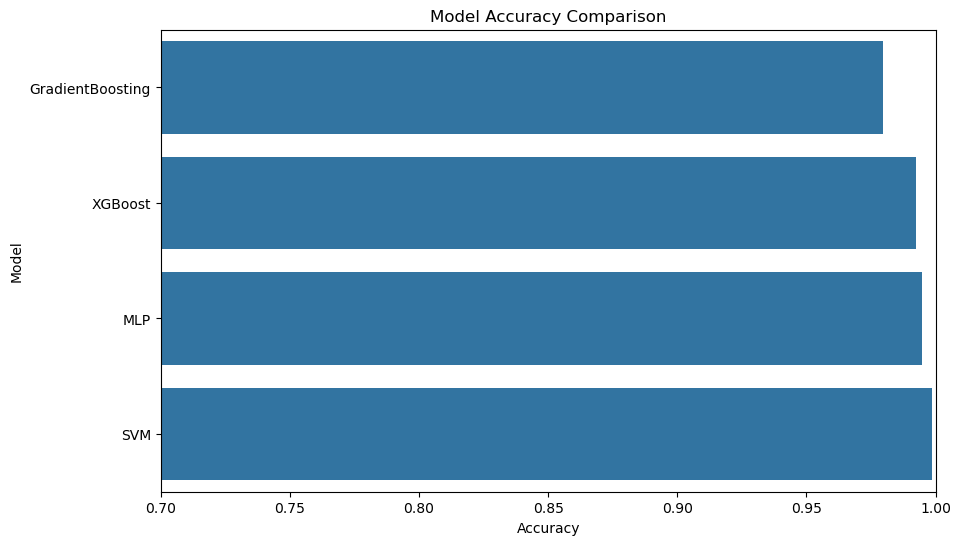

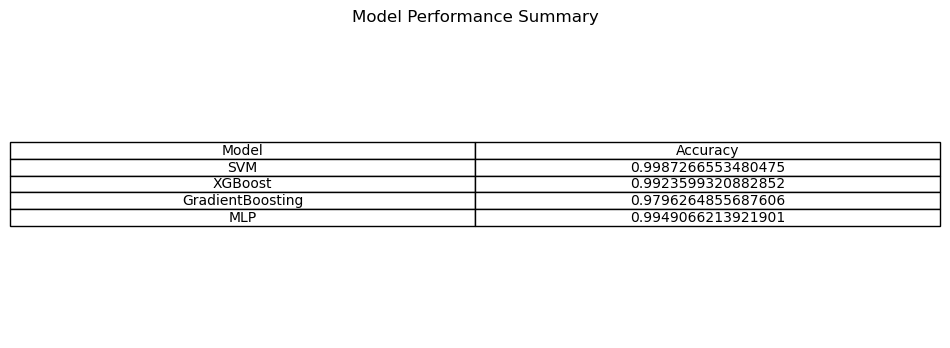

In [22]:
"""
Audio Classification Model Comparison Pipeline
"""

# %% Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# %% Configuration
RANDOM_STATE = 42
CLASS_NAMES = ['FAKE', 'REAL']
DATA_PATH = 'Audio data original.csv'
OUTPUT_DIR = 'model_comparison'

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# %% Model Definitions
MODELS = {
    # Classical Models
    'SVM': {
        'model': SVC(probability=True, random_state=RANDOM_STATE),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1]
        }
    },

    # Neural Networks
    'MLP': {
        'model': MLPClassifier(random_state=RANDOM_STATE),
        'params': {
            'hidden_layer_sizes': [(100,), (100,50)],
            'alpha': [0.0001, 0.001]
        }
    }
}

# %% Data Loading & Preprocessing
def load_and_preprocess(data_path):
    """Load and preprocess CSV data"""
    df = pd.read_csv(data_path)

    # Convert labels to numerical
    df['LABEL'] = df['LABEL'].map({'FAKE': 0, 'REAL': 1})

    X = df.drop('LABEL', axis=1)
    y = df['LABEL']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# %% Model Training & Evaluation
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    """Train and evaluate multiple models"""
    results = []

    for name, config in models.items():
        print(f"\nTraining {name}...")

        # Grid search with 3-fold CV
        grid = GridSearchCV(
            config['model'],
            config['params'],
            cv=3,
            n_jobs=-1,
            verbose=1
        )
        grid.fit(X_train, y_train)

        # Best model
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:,1]

        # Save metrics
        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Best Params': grid.best_params_,
            'Model Object': best_model
        })

        # Save model
        joblib.dump(best_model, f'{OUTPUT_DIR}/{name}_model.pkl')

    return pd.DataFrame(results)

# %% Visualization
def visualize_results(results_df):
    """Create comparison visualizations"""
    # Accuracy comparison
    plt.figure(figsize=(10,6))
    sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values('Accuracy'))
    plt.title('Model Accuracy Comparison')
    plt.xlim(0.7, 1.0)
    plt.savefig(f'{OUTPUT_DIR}/accuracy_comparison.png', bbox_inches='tight')

    # Metrics table
    plt.figure(figsize=(12,4))
    plt.axis('off')
    plt.table(cellText=results_df[['Model', 'Accuracy']].values,
              colLabels=results_df[['Model', 'Accuracy']].columns,
              cellLoc='center',
              loc='center')
    plt.title('Model Performance Summary')
    plt.savefig(f'{OUTPUT_DIR}/results_table.png', bbox_inches='tight')

# %% Main Pipeline
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test, _ = load_and_preprocess(DATA_PATH)

    # Train and evaluate models
    results_df = train_and_evaluate(MODELS, X_train, X_test, y_train, y_test)

    # Save results
    results_df.to_csv(f'{OUTPUT_DIR}/model_results.csv', index=False)

    # Visualize comparison
    visualize_results(results_df)

    print("\nFinal Results:")
    print(results_df[['Model', 'Accuracy']])

if __name__ == "__main__":
    main()
